In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import numpy as np
from skimage import io
from skimage import color
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def random_patch(image, manual, mask, count):
    # patch without any effects
    x,y = np.random.randint(0,im.shape[0]-256),np.random.randint(0,im.shape[1]-256)
    while (mask[x][y]<0.001 and mask[x][y+256]<0.001 and mask[x+256][y]<0.001 and mask[x+256][y+256]<0.001):
        x,y = np.random.randint(0,im.shape[0]-256),np.random.randint(0,im.shape[1]-256)
    t_im = image[x:x+256,y:y+256]
    io.imsave(PATH + "data/training/"+str(count)+"_orig.jpg",t_im)
    t_im = manual[x:x+256,y:y+256]
    io.imsave(PATH + "data/manual/"+str(count)+"_orig.jpg",t_im)
    
    # flipped image
    x,y = np.random.randint(0,im.shape[0]-256),np.random.randint(0,im.shape[1]-256)
    while (mask[x][y]<0.001 and mask[x][y+256]<0.001 and mask[x+256][y]<0.001 and mask[x+256][y+256]<0.001):
        x,y = np.random.randint(0,im.shape[0]-256),np.random.randint(0,im.shape[1]-256)
    t_im = np.flip(image[x:x+256,y:y+256],axis=(0,1))
    io.imsave(PATH + "data/training/"+str(count)+"_flip.jpg",t_im)
    t_im = manual[x:x+256,y:y+256]
    io.imsave(PATH + "data/manual/"+str(count)+"_flip.jpg",t_im)
    
    # noise addition
    x,y = np.random.randint(0,im.shape[0]-256),np.random.randint(0,im.shape[1]-256)
    while (mask[x][y]<0.001 and mask[x][y+256]<0.001 and mask[x+256][y]<0.001 and mask[x+256][y+256]<0.001):
        x,y = np.random.randint(0,im.shape[0]-256),np.random.randint(0,im.shape[1]-256)
    t_im = np.clip(image[x:x+256,y:y+256] + np.random.randint(20,size=(256,256,3)), 0 , 255)
    io.imsave(PATH + "data/training/"+str(count)+"_noise.jpg",t_im)
    t_im = manual[x:x+256,y:y+256]
    io.imsave(PATH + "data/manual/"+str(count)+"_noise.jpg",t_im)
    

In [ ]:
# Setting up the directory structures for storing training data
!mkdir -p data/training
!mkdir -p data/manual
!rm -rf data/training/*
!rm -rf data/manual/*

In [ ]:
# To ignore warnings when splitting images
import warnings
warnings.simplefilter('ignore')

In [ ]:
PATH = "/content/drive/My Drive/MI/VesselExtract/"
image_dir = PATH + "DRIVE/training/"
image_list = os.listdir(PATH + "DRIVE/training/images/")
image_list

['21_training.tif',
 '23_training.tif',
 '22_training.tif',
 '26_training.tif',
 '27_training.tif',
 '24_training.tif',
 '25_training.tif',
 '28_training.tif',
 '30_training.tif',
 '29_training.tif',
 '31_training.tif',
 '40_training.tif',
 '37_training.tif',
 '36_training.tif',
 '33_training.tif',
 '32_training.tif',
 '34_training.tif',
 '35_training.tif',
 '39_training.tif',
 '38_training.tif']

In [ ]:
count=0
for image in image_list:
    im = io.imread(image_dir+"images/"+image)
    mask = io.imread(image_dir+"mask/"+image[0:2]+"_training_mask.gif")
    manual = io.imread(image_dir+"1st_manual/"+image[0:2]+"_manual1.gif")
    
    # For each image generate 32 * 3 patches
    for i in range(32):
        random_patch(im,manual,mask,count)
        count+=1

In [ ]:
image_dir = PATH + "STARE/"
image_list = os.listdir(PATH + "STARE/stare-images/")
image_list

['im0001.ppm',
 'im0003.ppm',
 'im0004.ppm',
 'im0005.ppm',
 'im0044.ppm',
 'im0077.ppm',
 'im0081.ppm',
 'im0082.ppm',
 'im0139.ppm',
 'im0162.ppm',
 'im0163.ppm',
 'im0235.ppm',
 'im0236.ppm',
 'im0239.ppm',
 'im0240.ppm',
 'im0255.ppm',
 'im0291.ppm',
 'im0319.ppm',
 'im0324.ppm',
 'im0002.ppm']

In [ ]:
   
   for i in range(len(image_list)):
    img_name = image_list[i].split('.')[0]
    print(img_name+".vk"+".ppm")
    

im0001.vk.ppm
im0003.vk.ppm
im0004.vk.ppm
im0005.vk.ppm
im0044.vk.ppm
im0077.vk.ppm
im0081.vk.ppm
im0082.vk.ppm
im0139.vk.ppm
im0162.vk.ppm
im0163.vk.ppm
im0235.vk.ppm
im0236.vk.ppm
im0239.vk.ppm
im0240.vk.ppm
im0255.vk.ppm
im0291.vk.ppm
im0319.vk.ppm
im0324.vk.ppm
im0002.vk.ppm


In [ ]:
for i in range(len(image_list)):
    im = io.imread(image_dir+"stare-images/"+image_list[i])
    img_name = image_list[i].split('.')[0]
    manual = io.imread(image_dir+"labels-vk/"+img_name+".vk"+".ppm")
    mask = np.ones((im.shape[0],im.shape[1]))
    
    # For each image generate 32 * 3 patches
    for i in range(32):
        random_patch(im,manual,mask,count)
        count+=1

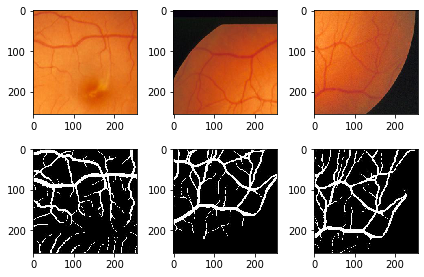

In [ ]:
im_number = str(np.random.randint(0,2000))
im = io.imread(PATH + "data/training/" + im_number + "_orig.jpg")
im_flip = io.imread(PATH + "data/training/" + im_number + "_flip.jpg")
im_noise = io.imread(PATH + "data/training/" + im_number + "_noise.jpg")
vessel = io.imread(PATH + "data/manual/"+ im_number + "_orig.jpg")
vessel_flip = io.imread(PATH + "data/manual/"+ im_number + "_flip.jpg")
vessel_noise = io.imread(PATH + "data/manual/"+ im_number + "_noise.jpg")

f = plt.figure()
f.add_subplot(2,3, 1)
plt.imshow(im)
f.add_subplot(2,3, 2)
plt.imshow(im_flip)
f.add_subplot(2,3, 3)
plt.imshow(im_noise)
f.add_subplot(2,3,4)
io.imshow(vessel)
f.add_subplot(2,3,5)
io.imshow(vessel_flip)
f.add_subplot(2,3,6)
io.imshow(vessel_noise)